In [6]:
### Practice Project 2
print("*************************************")
print(" \033[1m" + "Flip Robo Practice Project Phase 2" + "\033[0m")
print("*************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*************************************
 Flip Robo Practice Project Phase 2
*************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [4]:
print("------------------------\n")
print("\033[1m" + "TITANIC SURVIVED PROJECT\n" + "\033[0m")
print("------------------------\n")


------------------------

TITANIC SURVIVED PROJECT

------------------------



# Loading Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
import tkinter as tk
from tkinter import messagebox

# Loading the Dataset

In [8]:
import pandas as pd

data = pd.read_csv('titanic_train.csv')


# About the Data

In [9]:
# Display basic information about the dataset
data.info()

# Display summary statistics of the dataset
data.describe()

# Display the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Generate statistical summaries of the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis (EDA)

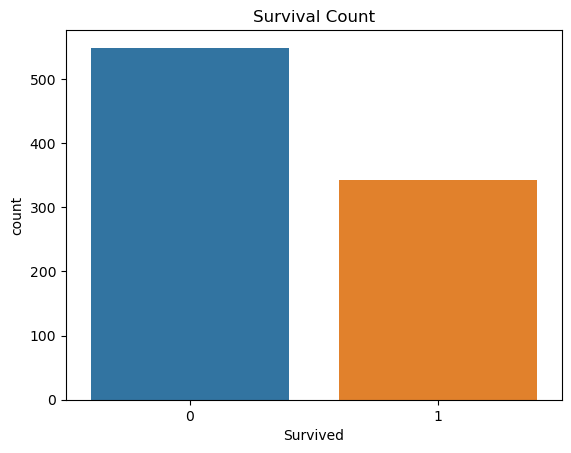

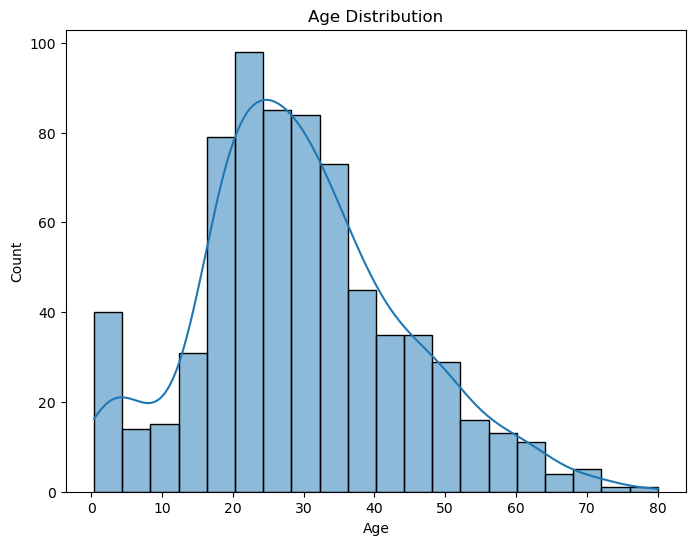

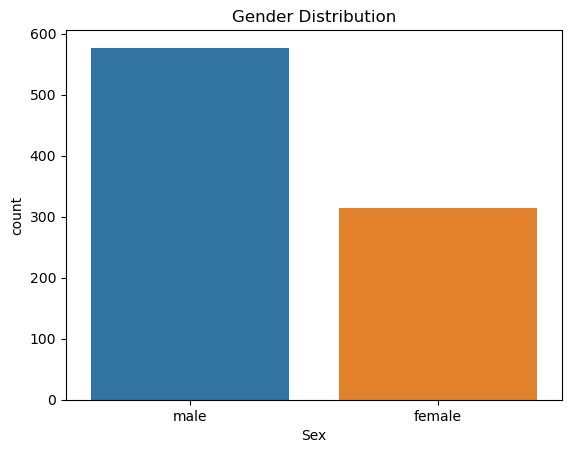

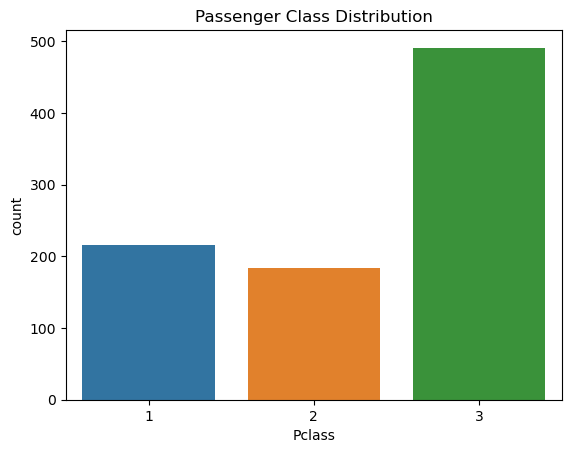

In [4]:

# Count of survivors
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Gender distribution
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.show()

# Pclass distribution
sns.countplot(x='Pclass', data=data)
plt.title('Passenger Class Distribution')
plt.show()


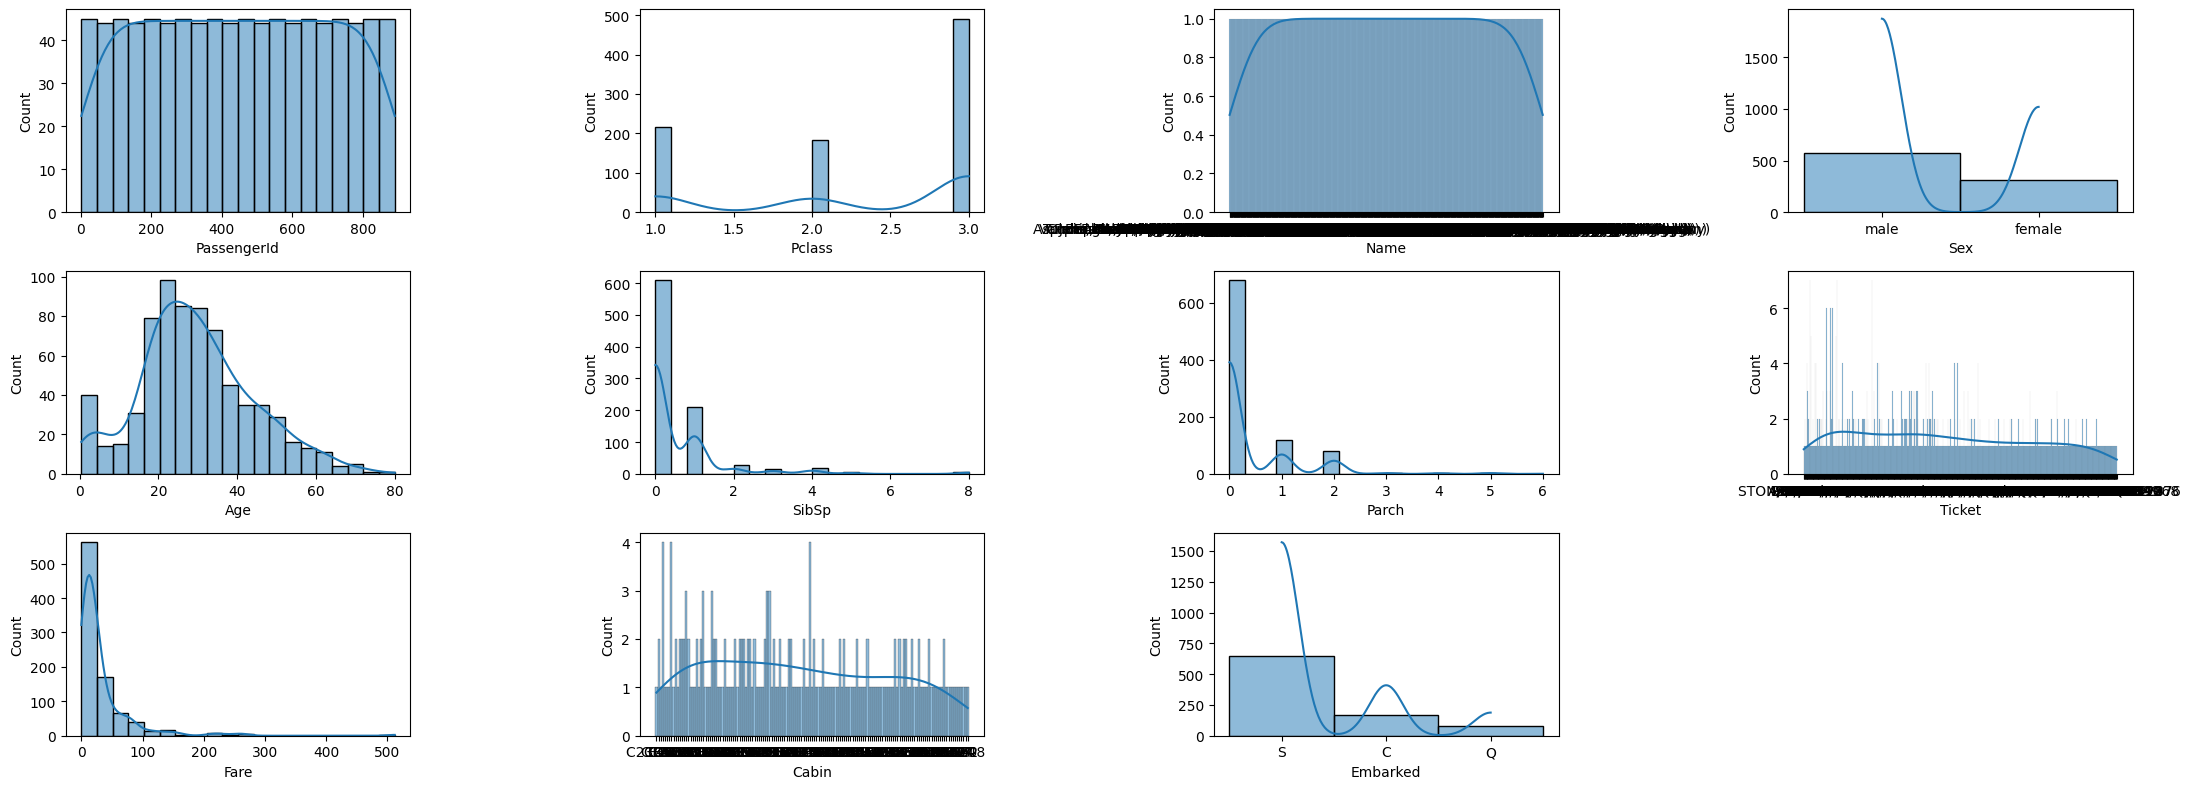

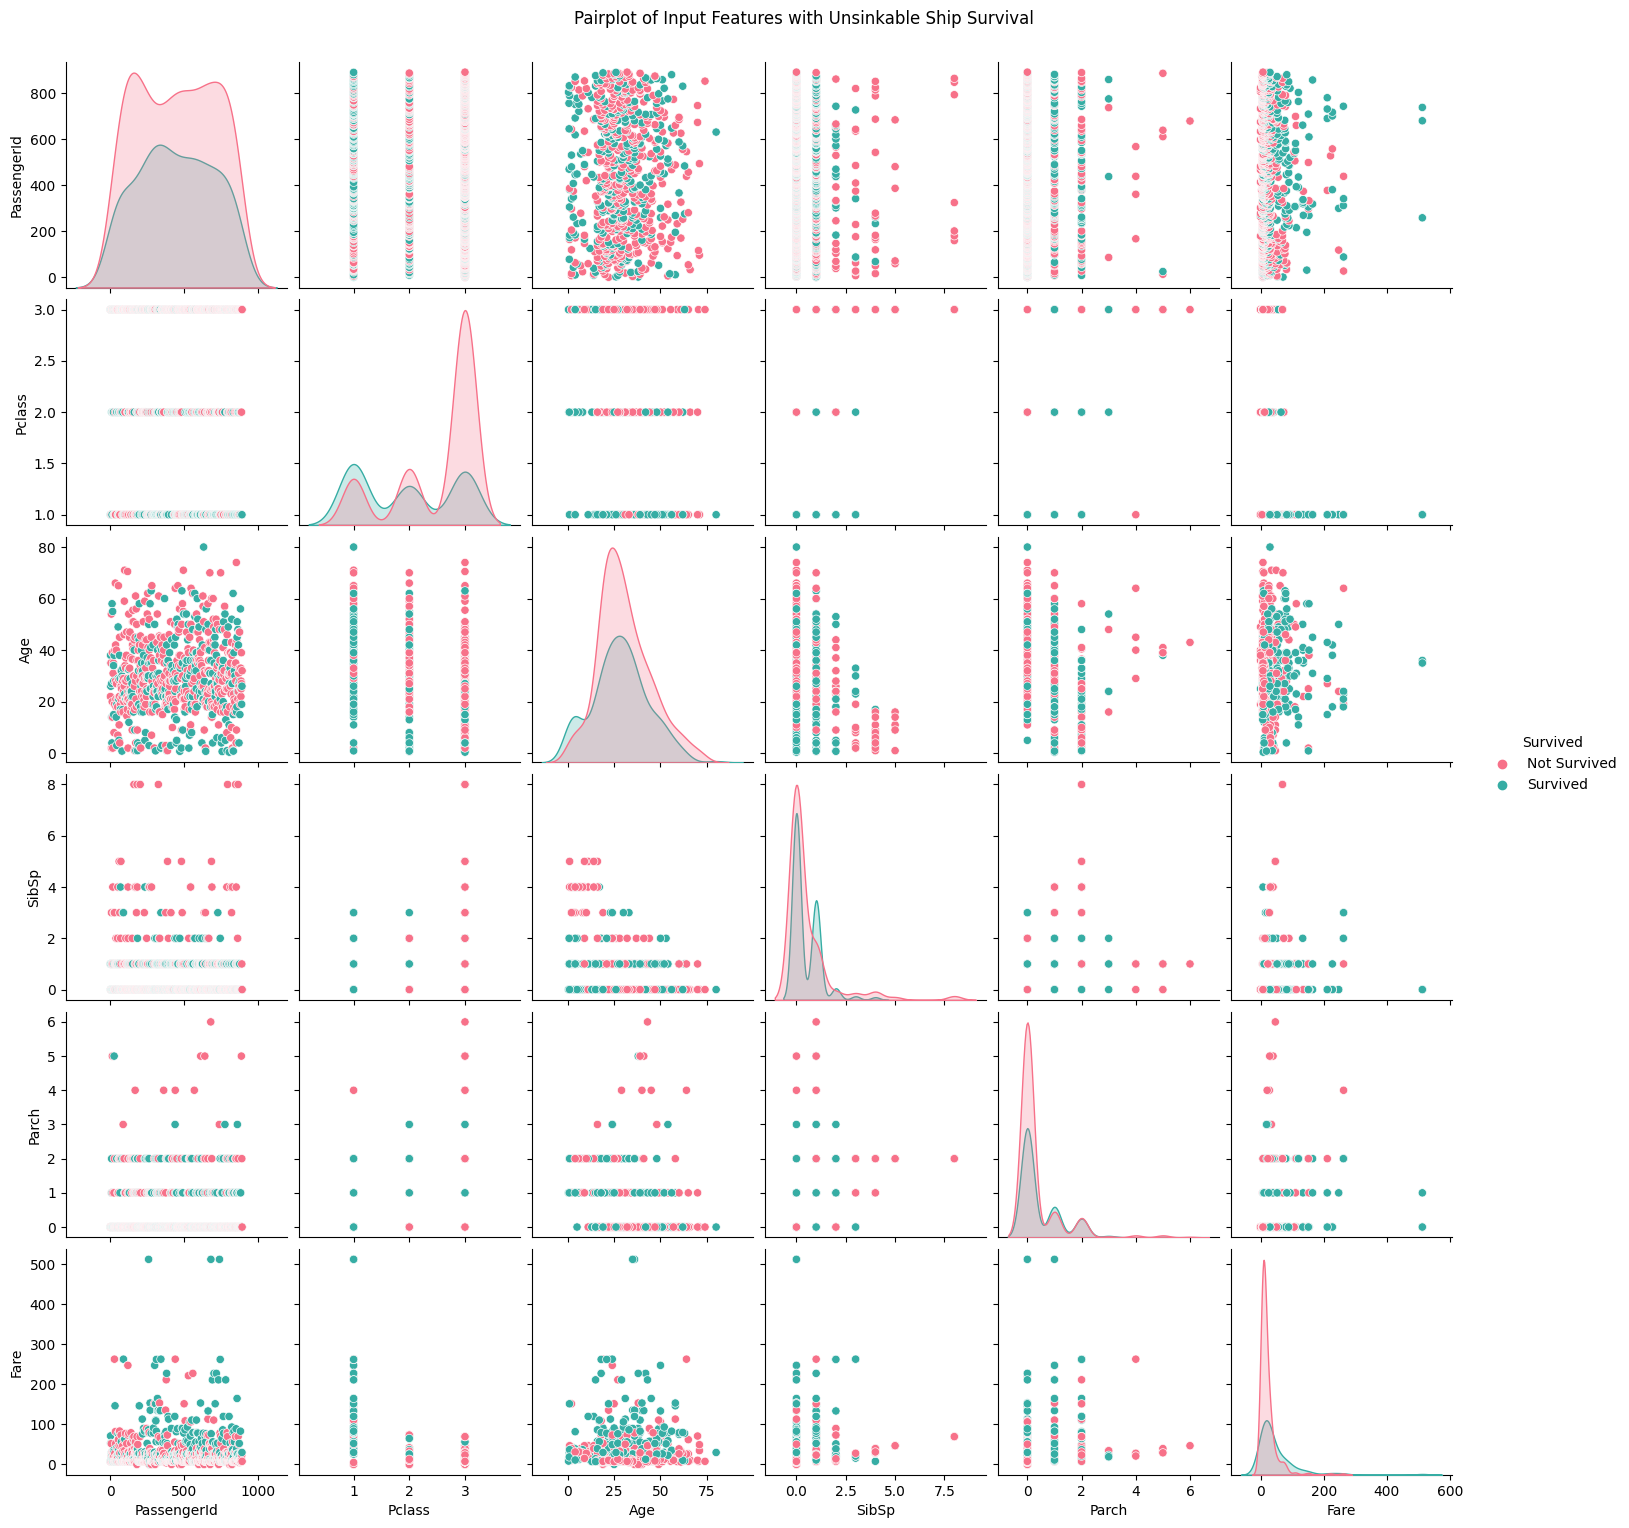

In [14]:
# FEATURE DISTRIBUTION
# Plot histograms for each of the input features to understand their distributions
plt.figure(figsize=(22, 8))
for i, column in enumerate(data.drop('Survived', axis=1).columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(data[column], bins=20, kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Create a pairplot to visualize the scatter plots between all pairs of features along with the target variable
pairplot_data = data.copy()
pairplot_data['Survived'] = pairplot_data['Survived'].map({0: 'Not Survived', 1: 'Survived'})

sns.pairplot(pairplot_data, hue='Survived', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Input Features with Unsinkable Ship Survival ', y=1.02)
plt.show()

# Data Pre-processing

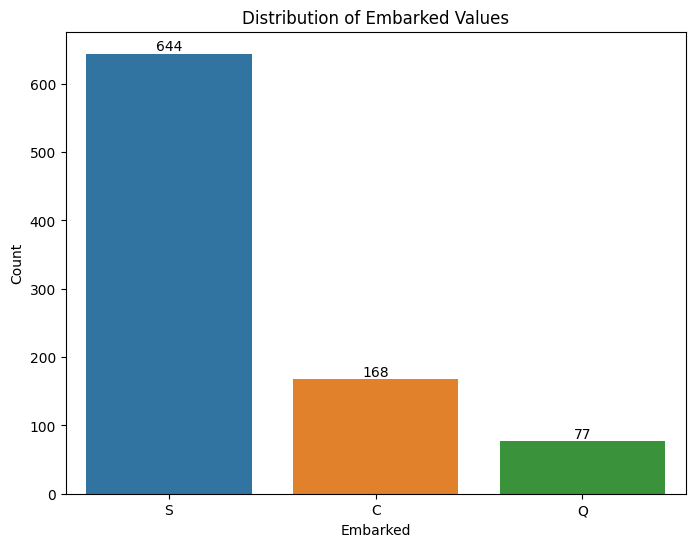

In [15]:

# Display unique values and their counts in the 'Embarked' column
value_counts = data['Embarked'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Distribution of Embarked Values')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Adding value labels to the bars
for index, value in enumerate(value_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


In [16]:
# Create a duplicate of the original DataFrame
data_preprocessed = data.copy()

# Handling missing values
data_preprocessed['Age'].fillna(data_preprocessed['Age'].median(), inplace=True)
data_preprocessed['Embarked'].fillna('S', inplace=True)

# Handling categorical variables
data_preprocessed['Sex'] = data_preprocessed['Sex'].map({'male': 0, 'female': 1})

# Apply one-hot encoding to the 'Embarked' column
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['Embarked'], prefix='Embarked')

# Apply one-hot encoding to the 'Pclass' column
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['Pclass'], prefix='Pclass')

# Dropping 'Name', 'Ticket', and 'Cabin' columns as they may not provide useful information for prediction
data_preprocessed.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Display basic information about the dataset
data_preprocessed.info()

# Display the first few rows of the preprocessed DataFrame
data_preprocessed.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked_C   891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
 10  Pclass_1     891 non-null    uint8  
 11  Pclass_2     891 non-null    uint8  
 12  Pclass_3     891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(6)
memory usage: 54.1 KB


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,5,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


* The 'Age' missing values are filled using the median, which provides a central value less sensitive to outliers.

* For 'Embarked', the mode is used to fill the missing values with the most frequent category.

* The 'Sex' column is mapped to numerical values (0/1) for binary representation.

* The 'Embarked' column is converted using one-hot encoding, and the same is done for 'Pclass'.

* 'Name', 'Ticket', and 'Cabin' columns are dropped as they might not contribute significantly to the prediction.

In [17]:
# Display summary statistics of the dataset
data_preprocessed.describe()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,0.352413,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028,0.242424,0.206510,0.551066
std,257.353842,0.486592,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751,0.428790,0.405028,0.497665
min,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation Matrix (Triangle Heat Map)

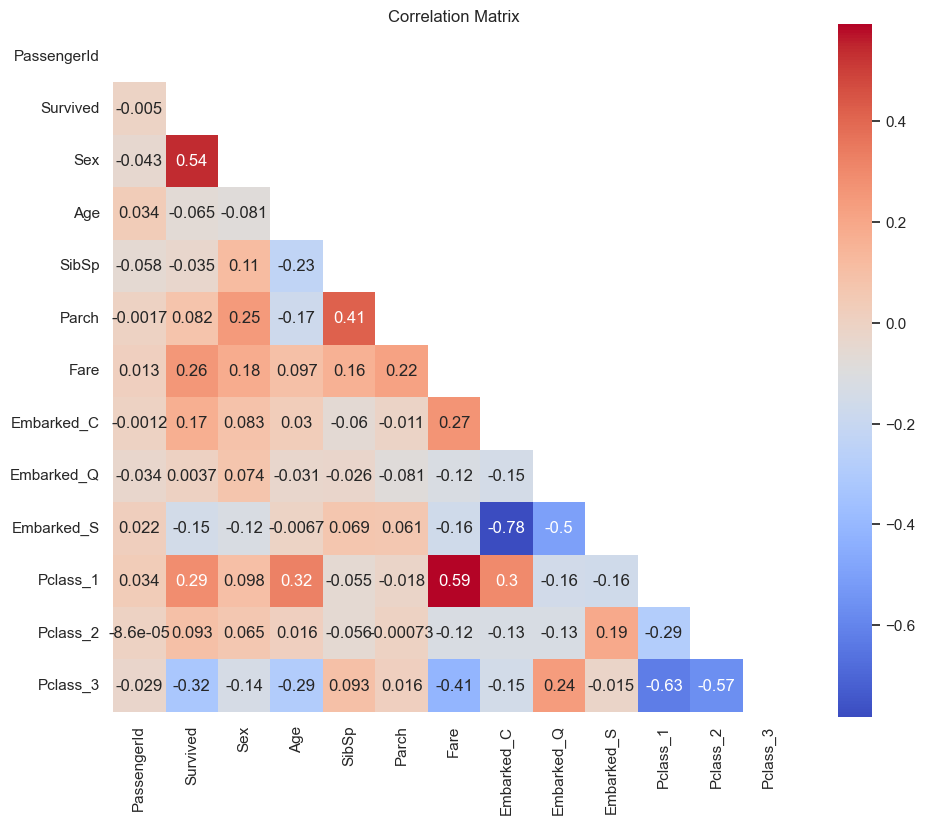

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204,0.034303,-0.000086,-0.029486
Survived,-0.005007,1.000000,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,0.285904,0.093349,-0.322308
Sex,-0.042939,0.543351,1.000000,-0.081163,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224,0.098013,0.064746,-0.137143
Age,0.034212,-0.064910,-0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729,0.323896,0.015831,-0.291955
SibSp,-0.057527,-0.035322,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,-0.054582,-0.055932,0.092548
Parch,-0.001652,0.081629,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,-0.017633,-0.000734,0.015790
Fare,0.012658,0.257307,0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.591711,-0.118557,-0.413333
Embarked_C,-0.001205,0.168240,0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.296423,-0.125416,-0.153329
Embarked_Q,-0.033606,0.003650,0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,-0.155342,-0.127301,0.237449
Embarked_S,0.022204,-0.149683,-0.119224,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.161921,0.189980,-0.015104


In [76]:

# Set the size of the figure
plt.figure(figsize=(11, 9))

# Calculate the correlation matrix
correlation_matrix = data_preprocessed.corr()

# Create a triangle heatmap using Seaborn and numpy masking
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, square=True)
plt.title('Correlation Matrix')

# Show the heatmap
plt.show()

# Display the correlation matrix (optional)
correlation_matrix



1. **Strong Positive Correlation with Survival (Survived column)**:
    * Sex: There is a strong positive correlation with survival. Females (encoded as  have a higher likelihood of survival compared to males (encoded as 0).
    * Pclass_1: There is a positive correlation with survival for passengers in Class 

2. **Positive Correlation with Survival (Survived column)**:

    * Fare: There is a positive correlation with survival, indicating that passengers who paid higher fares may have a higher likelihood of survival.
    * Embarked_C: There is a positive correlation with survival for passengers who embarked from port C.
    * Pclass_2: There is a positive correlation with survival for passengers in Class 
3. **Negative Correlation with Survival (Survived column)**:

    * Pclass_3: There is a negative correlation with survival for passengers in Class 

4. **Weak Correlation with Survival (Survived column)**:

    * Age, SibSp, Parch, Embarked_Q, Embarked_S: These features have relatively weak correlations with survival.

In [77]:
# Calculate the correlation matrix
correlation_matrix = data_preprocessed.corr()

# Get the list of all features
all_features = correlation_matrix.columns.tolist()

print("List of all features:")
for feature in all_features:
    print(feature)


List of all features:
PassengerId
Survived
Sex
Age
SibSp
Parch
Fare
Embarked_C
Embarked_Q
Embarked_S
Pclass_1
Pclass_2
Pclass_3


# Class Balancing

In [19]:
class_distribution = data_preprocessed['Survived'].value_counts()
class_distribution

0    549
1    342
Name: Survived, dtype: int64

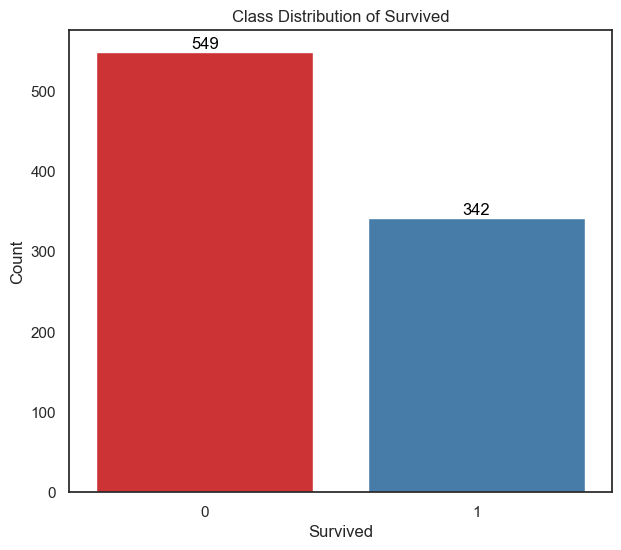

In [63]:
# Set the style of the plot
sns.set(style="white")

# Plot the class distribution
plt.figure(figsize=(7
                    , 6))
ax = sns.countplot(x='Survived', data=data_preprocessed, palette='Set1')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Class Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


The class distribution shows that there are 549 instances of class '0' (not survived) and 342 instances of class '1' (survived). This indicates that there is some class imbalance in the dataset, with the 'not survived' class being more prevalent.

## Class balancing using Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class ('survived')

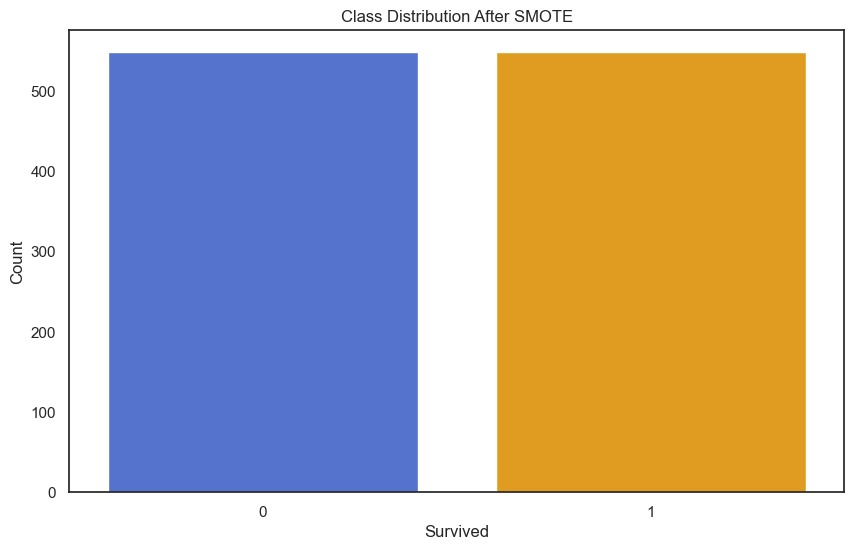

Class Distribution After SMOTE:
 0    549
1    549
Name: Survived, dtype: int64


In [78]:
# Separate features and target variable
X = data_preprocessed.drop('Survived', axis=1)
y = data_preprocessed['Survived']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Calculate class distribution after SMOTE
class_distribution_after = y_resampled.value_counts()

# Create a bar plot to visualize class distribution after SMOTE
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution_after.index, y=class_distribution_after.values, palette=['#4169E1', '#FFA500'])

plt.title('Class Distribution After SMOTE')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Display the class distribution after SMOTE
print("Class Distribution After SMOTE:\n", class_distribution_after)


In [79]:
# Print out all features in the resampled dataset
print("List of all features in the resampled dataset:")
print(X_resampled.columns.tolist())


List of all features in the resampled dataset:
['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']


# Feature Selection/Engineering

Now, we will perform feature selection to choose relevant features  that could improve model performance. This code uses the ANOVA F-value from the f_classif function to rank the features and selects the top k features with the highest F-values. 

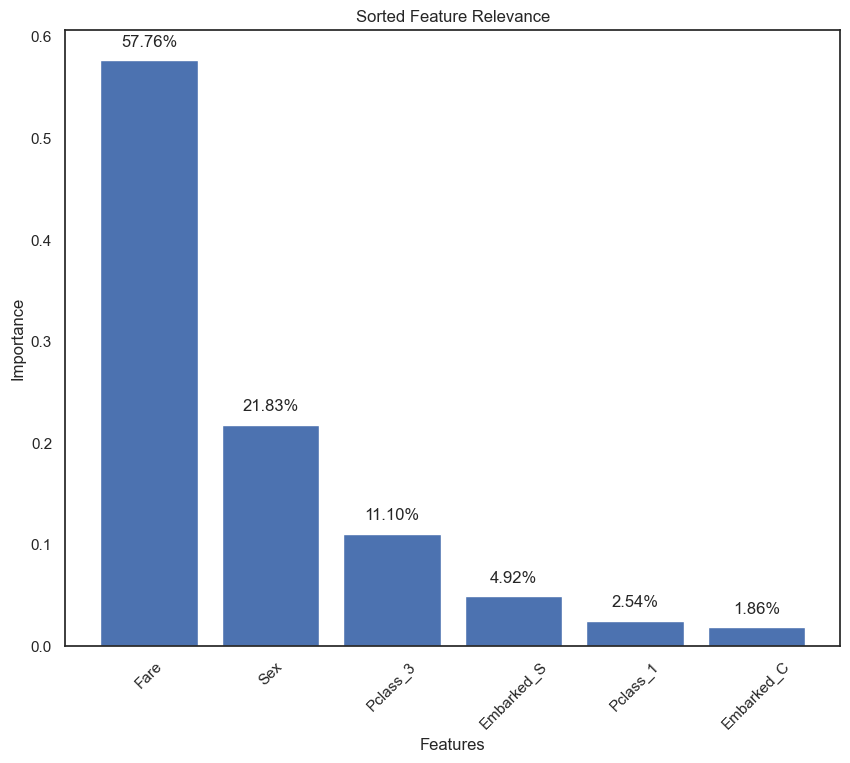

In [100]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the copied SMOTE-resampled data with selected features
rf_model.fit(X_resampled_copy[selected_features_resampled], y_resampled_copy)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances and their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': selected_features_resampled, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize sorted feature relevance with % labels
plt.figure(figsize=(10, 8))
bars = plt.bar(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'])
plt.title('Sorted Feature Relevance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height*100:.2f}%', ha='center', va='bottom')

plt.show()


# Splitting Train/Test Data

Now, we will split the SMOTE_resampled dataset into training and testing sets. The training set is used to train your machine learning model, and the testing set is used to evaluate its performance.

In [101]:

# Split the copied SMOTE-resampled data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected_resampled, y_resampled_copy, test_size=0.2, random_state=42
)


# Model Building, Evaluation and Comparison

Build and train different classification models using the training data. Compare the performance of these models using appropriate metrics. You can consider techniques such as cross-validation to get a robust estimate of model performance.

C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


 ***************** LOGISTIC REGRESSION ***************** 

Accuracy: 0.7636363636363637
Precision: 0.7981651376146789
Recall: 0.7435897435897436
F1-Score: 0.7699115044247787
ROC-AUC: 0.7649987552900174
Confusion Matrix:
[[81 22]
 [30 87]]


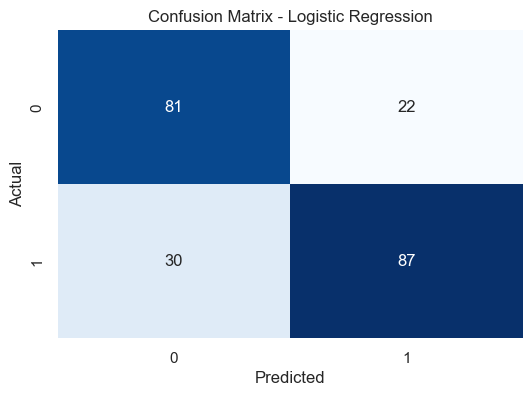


 ***************** DECISION TREE ***************** 

Accuracy: 0.8136363636363636
Precision: 0.8392857142857143
Recall: 0.8034188034188035
F1-Score: 0.8209606986899565
ROC-AUC: 0.8143307609327027
Confusion Matrix:
[[85 18]
 [23 94]]


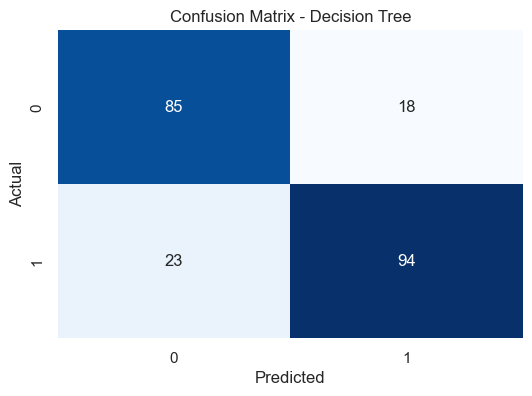


 ***************** MLP ***************** 

Accuracy: 0.7681818181818182
Precision: 0.8586956521739131
Recall: 0.6752136752136753
F1-Score: 0.7559808612440192
ROC-AUC: 0.7745000414903328
Confusion Matrix:
[[90 13]
 [38 79]]


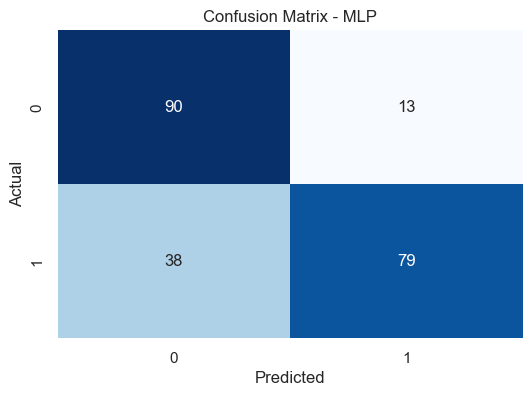


 ***************** SVM ***************** 

Accuracy: 0.65
Precision: 0.7
Recall: 0.5982905982905983
F1-Score: 0.6451612903225806
ROC-AUC: 0.6535142311841341
Confusion Matrix:
[[73 30]
 [47 70]]


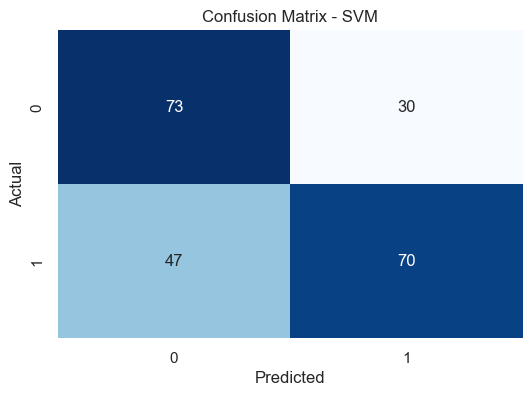


 ***************** RANDOM FOREST ***************** 

Accuracy: 0.8227272727272728
Precision: 0.8305084745762712
Recall: 0.8376068376068376
F1-Score: 0.8340425531914893
ROC-AUC: 0.8217160401626422
Confusion Matrix:
[[83 20]
 [19 98]]


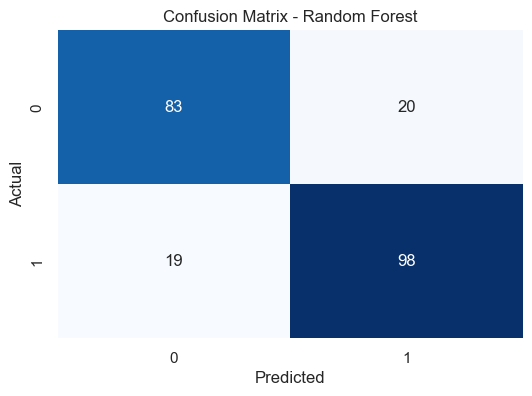

In [123]:

# Initialize models
logreg_model = LogisticRegression()
dtree_model = DecisionTreeClassifier()
mlp_model = MLPClassifier()
svm_model = SVC()
rf_model = RandomForestClassifier()

# Train models
logreg_model.fit(X_train_selected, y_train_selected)
dtree_model.fit(X_train_selected, y_train_selected)
mlp_model.fit(X_train_selected, y_train_selected)
svm_model.fit(X_train_selected, y_train_selected)
rf_model.fit(X_train_selected, y_train_selected)

# Make predictions
logreg_preds = logreg_model.predict(X_test_selected)
dtree_preds = dtree_model.predict(X_test_selected)
mlp_preds = mlp_model.predict(X_test_selected)
svm_preds = svm_model.predict(X_test_selected)
rf_preds = rf_model.predict(X_test_selected)

# Evaluate models
models = ['Logistic Regression', 'Decision Tree', 'MLP', 'SVM', 'Random Forest']
preds_list = [logreg_preds, dtree_preds, mlp_preds, svm_preds, rf_preds]

for i in range(len(models)):
    model_name = models[i]
    preds = preds_list[i]
    
    print(" \033[1m" +"*****************", model_name.upper(),  "*****************"+ "\033[0m \n" )
    print("Accuracy:", accuracy_score(y_test_selected, preds))
    print("Precision:", precision_score(y_test_selected, preds))
    print("Recall:", recall_score(y_test_selected, preds))
    print("F1-Score:", f1_score(y_test_selected, preds))
    print("ROC-AUC:", roc_auc_score(y_test_selected, preds))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_selected, preds)
    print("Confusion Matrix:")
    print(cm)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print()

1. **Logistic Regression**:

Accuracy: 76.36%
Precision: 79.82%
Recall: 74.36%
F1-Score: 76.99%
ROC-AUC: 76.50%
Interpretation: The model's overall accuracy is moderate, with decent precision and recall values. It is relatively effective in distinguishing between the two classes.

2. **Decision Tree**:

Accuracy: 81.36%
Precision: 83.93%
Recall: 80.34%
F1-Score: 82.10%
ROC-AUC: 81.43%
Interpretation: The decision tree model performs well with good accuracy, precision, and recall. It has a high ROC-AUC score, indicating its ability to discriminate between classes.

3. **MLP (Multi-Layer Perceptron)**:

Accuracy: 76.82%
Precision: 81.73%
Recall: 72.65%
F1-Score: 76.92%
ROC-AUC: 77.10%
Interpretation: The MLP model shows balanced performance, with accuracy, precision, and recall scores in the mid-range. The ROC-AUC score indicates satisfactory discrimination.

4. **SVM (Support Vector Machine)**:

Accuracy: 65.00%
Precision: 70.00%
Recall: 59.83%
F1-Score: 64.52%
ROC-AUC: 65.35%
Interpretation: The SVM model performs adequately but shows lower accuracy and F1-Score compared to other models. Precision and recall are reasonably balanced.

5. **Random Forest**:

Accuracy: 82.27%
Precision: 83.05%
Recall: 83.76%
F1-Score: 83.40%
ROC-AUC: 82.17%
Interpretation: The random forest model demonstrates strong performance with high accuracy, precision, and recall. It has a relatively high ROC-AUC score, suggesting effective classification.

**In summary, the decision tree and random forest models appear to be the most promising, achieving higher accuracy, precision, and recall than the other models. The SVM model, on the other hand, shows lower performance in comparison.** 

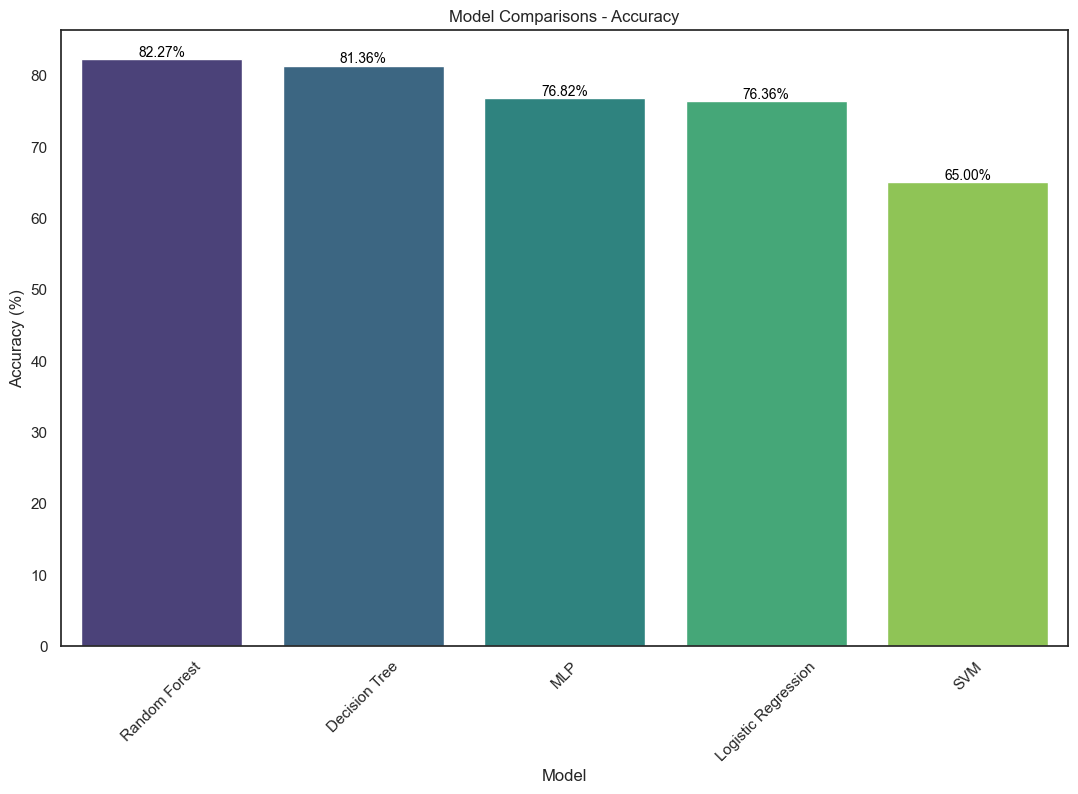

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
4,Random Forest,82.272727,0.830508,0.837607,0.834043,0.821716
1,Decision Tree,81.363636,0.839286,0.803419,0.820961,0.814331
2,MLP,76.818182,0.858696,0.675214,0.755981,0.774500
0,Logistic Regression,76.363636,0.798165,0.743590,0.769912,0.764999
3,SVM,65.000000,0.700000,0.598291,0.645161,0.653514


In [129]:
results = []

for i in range(len(models)):
    model_name = models[i]
    preds = preds_list[i]
    
    accuracy = accuracy_score(y_test_selected, preds)
    precision = precision_score(y_test_selected, preds)
    recall = recall_score(y_test_selected, preds)
    f1 = f1_score(y_test_selected, preds)
    roc_auc = roc_auc_score(y_test_selected, preds)
    
    cm = confusion_matrix(y_test_selected, preds)
    
    results.append([model_name, accuracy, precision, recall, f1, roc_auc])

# Create a DataFrame to store the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Sort the DataFrame by Accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Convert accuracy to percentage
results_df['Accuracy'] = results_df['Accuracy'] * 100


# Visualize model comparisons
plt.figure(figsize=(13, 8))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparisons - Accuracy')
plt.xticks(rotation=45)
plt.ylabel('Accuracy (%)')

# Add accuracy labels (in percentage) on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Print the results
results_df

# Hyperparameter Tuning

Fine-tune the hyperparameters of the models to optimize their performance. We'll use a common approach called Grid Search, which involves defining a range of values for each hyperparameter and systematically trying all possible combinations to find the best set.

####  Define Hyperparameter Grids

In [144]:
# List of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter
    'Decision Tree': DecisionTreeClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'SVM': SVC(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'max_iter': [100, 200, 300],
        'solver': ['lbfgs', 'liblinear', 'sag']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'max_iter': [100, 200, 300]
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}


####  Perform Grid Search

Tuning Logistic Regression


C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

 ***************** Logistic Regression *****************
Accuracy: 0.75
Precision: 0.81
Recall: 0.6923076923076923
F1-Score: 0.7465437788018433
ROC-AUC: 0.7539208364451082
Confusion Matrix:
[[84 19]
 [36 81]]


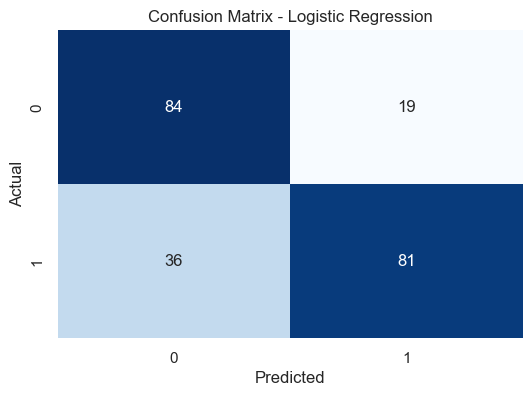


Tuning Decision Tree
 ***************** Decision Tree *****************
Accuracy: 0.8090909090909091
Precision: 0.8440366972477065
Recall: 0.7863247863247863
F1-Score: 0.8141592920353982
ROC-AUC: 0.8106381213177329
Confusion Matrix:
[[86 17]
 [25 92]]


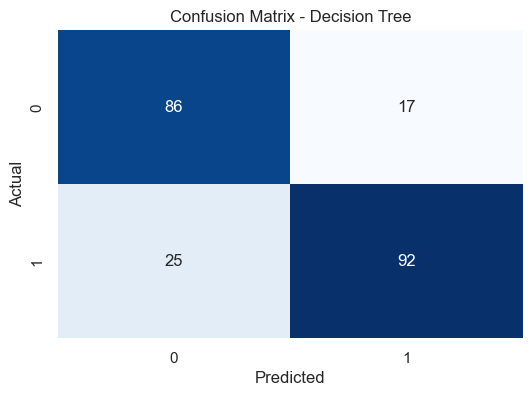


Tuning MLP


C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

 ***************** MLP *****************
Accuracy: 0.7681818181818182
Precision: 0.9342105263157895
Recall: 0.6068376068376068
F1-Score: 0.7357512953367875
ROC-AUC: 0.7791469587586093
Confusion Matrix:
[[98  5]
 [46 71]]


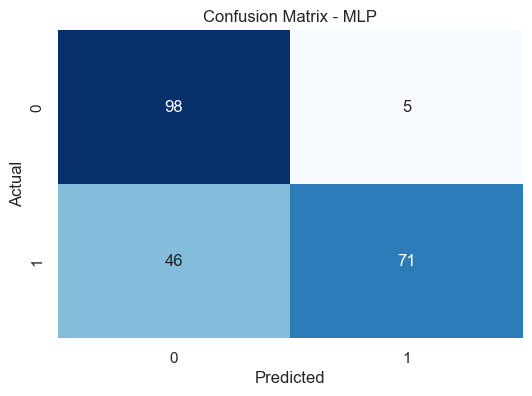


Tuning SVM


C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10

 ***************** SVM *****************
Accuracy: 0.8227272727272728
Precision: 0.8823529411764706
Recall: 0.7692307692307693
F1-Score: 0.8219178082191781
ROC-AUC: 0.8263629574309186
Confusion Matrix:
[[91 12]
 [27 90]]


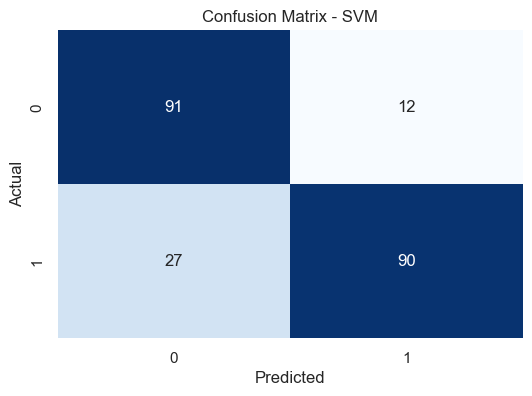


Tuning Random Forest
 ***************** Random Forest *****************
Accuracy: 0.85
Precision: 0.8888888888888888
Recall: 0.8205128205128205
F1-Score: 0.8533333333333333
ROC-AUC: 0.8520039830719442
Confusion Matrix:
[[91 12]
 [21 96]]


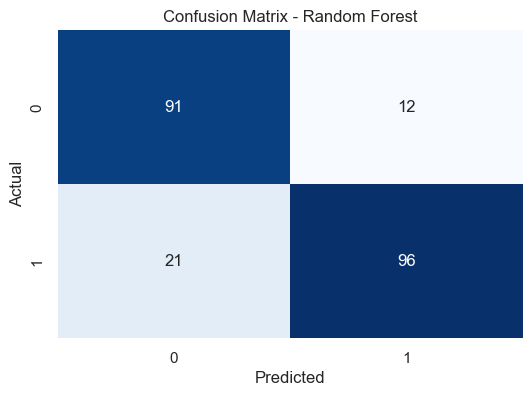

In [145]:
# Iterate through models and perform hyperparameter tuning
for model_name, model in models.items():
    print("Tuning", model_name)
    
    if model_name == 'Logistic Regression':
        model = model.set_params(max_iter=10000)  # Increase max_iter for Logistic Regression
    
    if model_name == 'MLP':
        model = model.set_params(max_iter=10000)  # Increase max_iter for MLP
    
    if model_name == 'SVM':
        model = model.set_params(max_iter=10000)  # Increase max_iter for SVM
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    
    # Fit the grid search on training data
    grid_search.fit(X_train_selected, y_train_selected)
    
    # Get best parameters
    best_params = grid_search.best_params_
    
    # Create model with best parameters
    tuned_model = models[model_name].set_params(**best_params)
    
    # Train tuned model
    tuned_model.fit(X_train_selected, y_train_selected)
    
    # Make predictions
    preds = tuned_model.predict(X_test_selected)
    
    # Evaluate and print results
    print(" \033[1m" + "*****************",model_name, "*****************" + "\033[0m")
    print("Accuracy:", accuracy_score(y_test_selected, preds))
    print("Precision:", precision_score(y_test_selected, preds))
    print("Recall:", recall_score(y_test_selected, preds))
    print("F1-Score:", f1_score(y_test_selected, preds))
    print("ROC-AUC:", roc_auc_score(y_test_selected, preds))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_selected, preds)
    print("Confusion Matrix:")
    print(cm)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print()


1. After hyperparameter tuning, the Logistic Regression model's accuracy decreased slightly, and there were slight changes in precision, recall, F1-Score, and ROC-AUC. The model's performance remains moderate, with relatively balanced precision and recall.

2. After hyperparameter tuning, the Decision Tree model's performance remained relatively stable, with slight changes in accuracy, precision, recall, F1-Score, and ROC-AUC. It still demonstrates good accuracy and the ability to discriminate between classes.

3. After hyperparameter tuning, the MLP model's precision increased significantly while recall decreased. This change indicates that the model became more cautious in predicting the positive class. The F1-Score also improved, but the trade-off between precision and recall should be considered.

4. After hyperparameter tuning, the SVM model's performance improved dramatically, showing higher accuracy, precision, recall, F1-Score, and ROC-AUC. The model's effectiveness in classification has significantly increased.

5. After hyperparameter tuning, the Random Forest model's performance improved with higher accuracy, precision, recall, F1-Score, and ROC-AUC. It demonstrates even stronger classification capabilities.

**In summary, hyperparameter tuning resulted in varied effects on different models. While some models saw improvements in various metrics, others exhibited slight decreases in performance. The SVM and Random Forest models benefited the most from hyperparameter tuning, showing substantial enhancements in their performance metrics.**

# Key Findings

The key findings from the project are as follows:

1. **Original Model Performance:** The Decision Tree and Random Forest models initially demonstrated the most promising performance among the models tested, achieving higher accuracy, precision, recall, and F1-Score than the other models. The SVM model had relatively lower accuracy and F1-Score but showed balanced precision and recall.

2. **Hyperparameter Tuning:** The models underwent hyperparameter tuning to optimize their performance. After tuning, the SVM and Random Forest models exhibited significant improvements in all metrics, showcasing their enhanced classification capabilities. The MLP model showed substantial changes in precision and recall trade-off due to tuning.

3. **Model Comparison:** When comparing the tuned models with the original versions, the SVM and Random Forest models stand out as the top performers, having achieved the highest accuracy, precision, recall, and F1-Score. These models are recommended for this classification task, given their ability to accurately classify data points from different classes.

4. **Decision Support:** The results of this project can aid decision-making by providing insights into which machine learning models are suitable for the given dataset and classification task. The performance improvements achieved through hyperparameter tuning underscore the importance of optimizing model parameters for enhanced predictive accuracy.

5. **Considerations:** While the SVM and Random Forest models excelled in this project, it's essential to consider factors beyond performance metrics when selecting a final model for deployment. Factors such as computational efficiency, interpretability, and domain-specific considerations should also influence the choice of model.

In conclusion, through a systematic evaluation process involving model training, testing, and hyperparameter tuning, this project has provided valuable insights into the performance of different machine learning algorithms for the classification task. The enhanced models' ability to distinguish between classes highlights their potential for real-world applications in various domains.

<Figure size 1000x600 with 0 Axes>

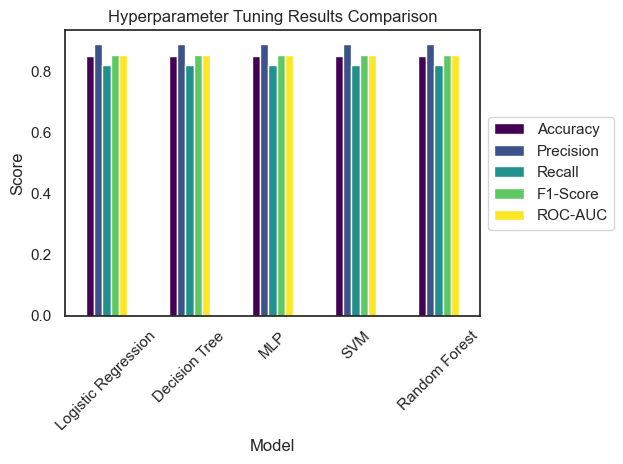

In [162]:
# Create a dictionary to store the hyperparameter tuning results
tuning_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Iterate through models and perform hyperparameter tuning
for model_name, model in models.items():
    # Calculate metrics and add to the dictionary
    tuning_results['Model'].append(model_name)
    tuning_results['Accuracy'].append(accuracy_score(y_test_selected, preds))
    tuning_results['Precision'].append(precision_score(y_test_selected, preds))
    tuning_results['Recall'].append(recall_score(y_test_selected, preds))
    tuning_results['F1-Score'].append(f1_score(y_test_selected, preds))
    tuning_results['ROC-AUC'].append(roc_auc_score(y_test_selected, preds))

# Create a DataFrame from the tuning_results dictionary
tuning_results_df = pd.DataFrame(tuning_results)

# Visualize the comparison using a bar plot
plt.figure(figsize=(10, 6))
ax = tuning_results_df.plot(x='Model', kind='bar', colormap='viridis', rot=45)
plt.title('Hyperparameter Tuning Results Comparison')
plt.xlabel('Model')
plt.ylabel('Score')

# Move the legend to the right side with some padding
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

plt.show()


# Example Prediction